In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def izracunajA(a, b, A0, B0, t):
    return ((math.sqrt(a*b)*A0 - a*B0)/(2*math.sqrt(a*b))*(math.e**(math.sqrt(a*b)*t))) + ((math.sqrt(a*b)*A0 + a*B0)/(2*math.sqrt(a*b))*(math.e**(-math.sqrt(a*b)*t)))

In [3]:
def izracunajB(a, b, A0, B0, t):
    return ((math.sqrt(a*b)*B0 - b*A0)/(2*math.sqrt(a*b))*(math.e**(math.sqrt(a*b)*t))) + ((math.sqrt(a*b)*B0 + b*A0)/(2*math.sqrt(a*b))*(math.e**(-math.sqrt(a*b)*t)))

In [4]:
def odrediTrenutakPobede(a, b, A0, B0):
    for i in list(odrediInterval(0, 100, 0.01)):
        if izracunajA(a, b, A0, B0, i) <= 0 or izracunajB(a, b, A0, B0, i) <= 0:
            return i-0.00001
    return i

In [5]:
def odrediInterval(pocetak, kraj, korak):
    interval = []
    while pocetak < kraj:
        interval.append(pocetak)
        pocetak += korak
    return interval

In [6]:
def simulirajBitku(a, b, A0, B0):
    trenutakPobede = odrediTrenutakPobede(a, b, A0, B0)
    t = np.array(list(odrediInterval(0, trenutakPobede, 0.001)))
    A = izracunajA(a, b, A0, B0, t)
    B = izracunajB(a, b, A0, B0, t)
    
    plt.plot(t, A, label='Vojska A')
    plt.plot(t, B, label='Vojska B')
    
    informacije = "A0=" + str(A0) + "\nB0=" + str(B0)+ "\na=" + str(a) + "\nb=" + str(b)
    plt.plot([], [], ' ', label=informacije)

    plt.legend()
    plt.xlabel('Vreme t')
    plt.ylabel('Brojnost vojske')

    plt.show()

    if (b*A0**2 > a*B0**2):
        print("Pobedjuje A!")
    elif (b*A0**2 < a*B0**2):
        print("Pobedjuje B!")
    else:
        print("Neodlucna bitka!")

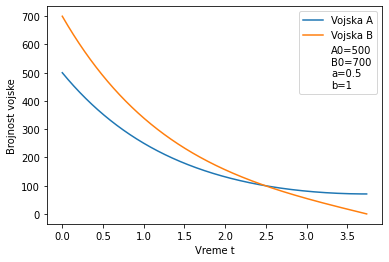

Pobedjuje A!


In [7]:
simulirajBitku(0.5, 1, 500, 700)

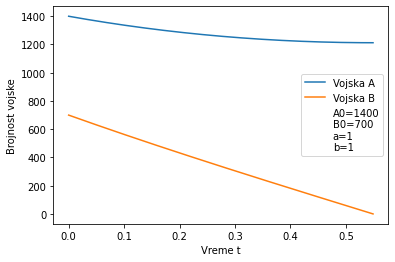

Pobedjuje A!


In [8]:
simulirajBitku(1, 1, 1400, 700)

In [9]:
def odrediPobednika(a, b, A0, B0):
    if (b*A0**2 > a*B0**2):
        return "A"
    elif (b*A0**2 < a*B0**2):
        return "B"
    else:
        return "D"

def simulirajBitku2(A0, B0):
    N = 50
    r = np.array(list(range(N)))
    pobednici = np.zeros((N, N))
    
    # x je ustvari nasa ubojitost (b)
    for x in r:
        # protivnicka ubojitost (a)
        for y in r:
            if x==0 or y==0:
                continue
            w = odrediPobednika(y, x, A0, B0)
            if (w == "A"):
                pobednici[y][x] = 1
            elif (w == "B"):
                pobednici[y][x] = -1
                
    noviPobednici = np.delete(pobednici, 0, 0)
    noviPobednici = np.delete(noviPobednici, 0, 1)

    plt.imshow(noviPobednici)
    plt.xlabel('Ubojitost vojske A')
    plt.ylabel('Ubojitost vojske B')

    cbar = plt.colorbar()
    cbar.set_ticks([-1,0,1])
    cbar.set_ticklabels(["Pobeda B","Nereseno","Pobeda A"])
    plt.show()

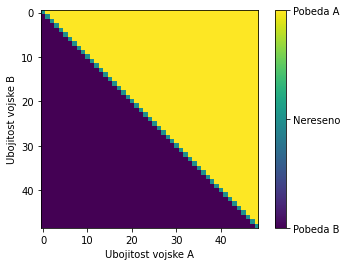

In [10]:
simulirajBitku2(500, 500)

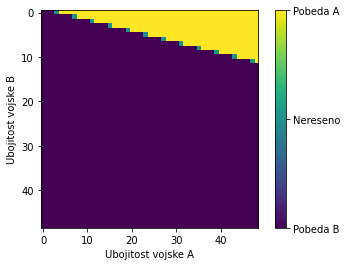

In [11]:
simulirajBitku2(500, 1000)

In [12]:
def izracunajZasedaA(a, b, t, d1, c2):
    return (2*d1)/(c2*(math.e**(d1*b*t)) - 1) + d1   

In [13]:
def izracunajZasedaB(a, b, t, d1, c2):
    return (2/a)*((b*c2*(d1**2)*(math.e**(d1*b*t)))/((c2*(math.e**(d1*b*t)) - 1)**2))

In [14]:
def nadjiC2(a, b, A0, B0):
    a1 = B0
    b1 = 2*B0 - (2*b*(A0**2))/a
    c1 = B0
    return (-b1 + math.sqrt((b1**2) - 4*a1*c1))/(2*a1) 

In [15]:
def simulirajBitkuZaseda(a, b, A0, B0):
    c2 = nadjiC2(a, b, A0, B0)
    d1 = A0 * ((c2-1)/(c2+1))
    trenutakPobede = odrediTrenutakPobede(a, b, A0, B0)
    t = np.array(list(odrediInterval(0, trenutakPobede, 0.001)))
    A = izracunajZasedaA(a, b, t, d1, c2)
    B = izracunajZasedaB(a, b, t, d1, c2)
    
    plt.plot(t, A, label='Vojska A')
    plt.plot(t, B, label='Vojska B')

    informacije = "A0=" + str(A0) + "\nB0=" + str(B0)+ "\na=" + str(a) + "\nb=" + str(b)
    plt.plot([], [], ' ', label=informacije)
    
    plt.legend(loc='upper right')
    plt.xlabel('Vreme t')
    plt.ylabel('Brojnost vojske')

    plt.show()

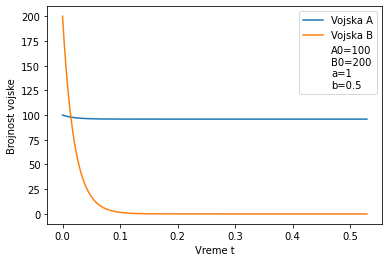

In [16]:
simulirajBitkuZaseda(1, 0.5, 100, 200)

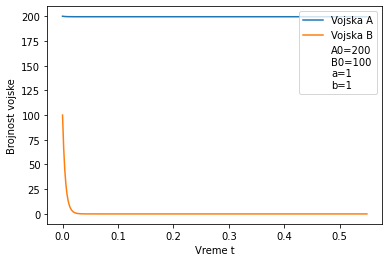

In [17]:
simulirajBitkuZaseda(1, 1, 200, 100)